# Расчет выходного сигнала двухслойного персептрона

## Задание

- Разработать программное обеспечение для расчета выходного сигнала двухслойного персептрона с прямым распространением сигнала и сигмоидальной функцией активации (язык программирования студент выбирает самостоятельно).

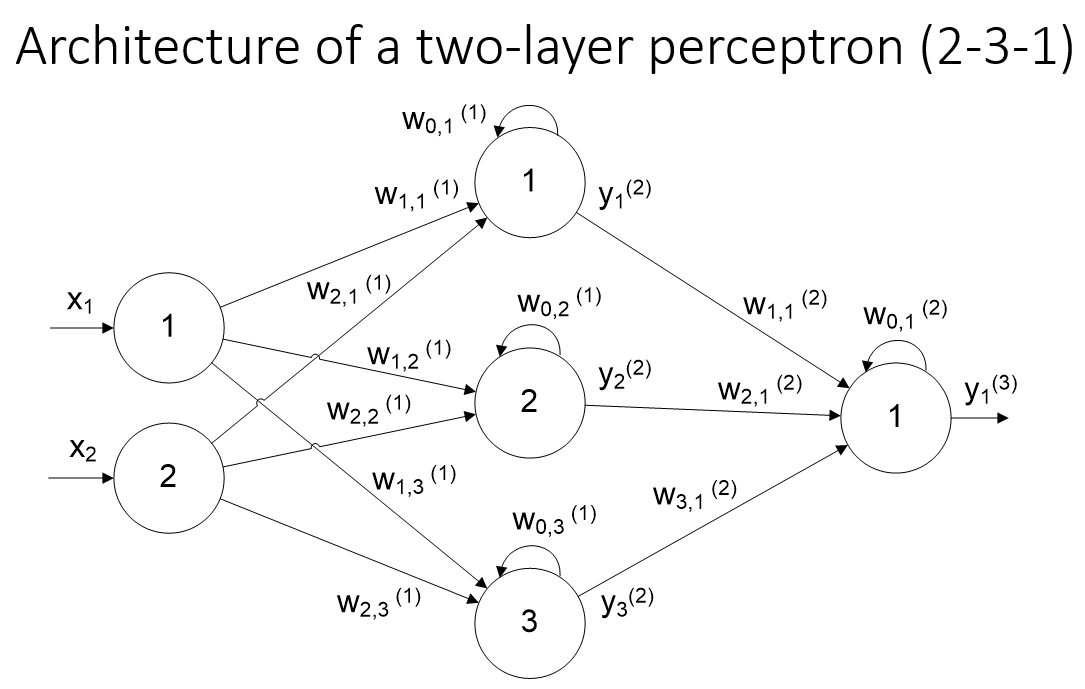

## *Сделаем сквозную нумерацию для упрощения хранения весов в массиве*

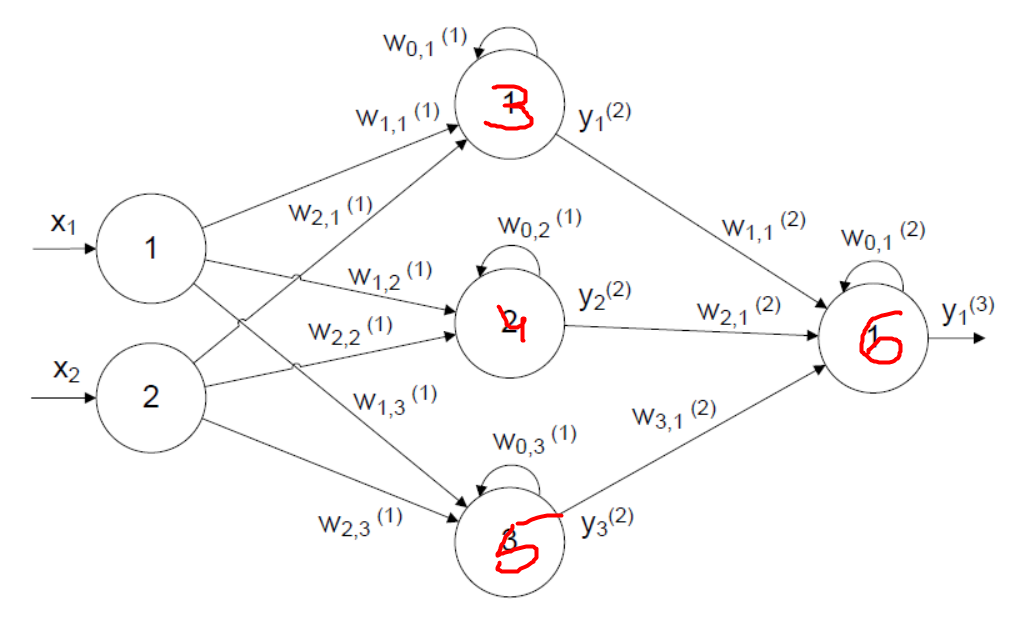

In [1]:
from math import exp
from os.path import isfile
from random import uniform
from pickle import dump, load

In [2]:
class TwoLayerPerceptron:
    """ Two-layer (2-3-1) perceptron """
    
    n_neurons = 6
    
    def __init__(self, X1, X2, pm=1, fn='weights.dat'):
        self.X1 = X1 # first input signal
        self.X2 = X2 # second input signal
        self.fn = fn # file with weights
        self.x0 = pm # recursive weight permanent multiplier
    
    def __save_weights(self):
        """ Save network weights into a file """
        if self.weights:
            with open(self.fn, 'wb') as f:
                dump(self.weights, f)
        else:
            raise Exception("Weights are not initialized. Nothing to save!")
    
    def __load_weights(self):
        """ Load network weights from a file """
        try:
            with open(self.fn, 'rb') as f:
                self.weights = load(f)
        except FileNotFoundError:
            print(f"File was not found: '{self.fn}'")
    
    def get_weights_file_name(self):
        """ Get file name where network weigts are stored """
        return self.fn
    
    def sigmoid(self, x):
        """ Sigmoid activation function """
        return 1 / (1 + exp(-x))
    
    def show_weights(self):
        """ Show network weights """
        for w in self.weights:
            print(w)
    
    def find_Y(self):
        """ Find network output signal """
        serialize = False
        
        # check if weights already exist
        if isfile(self.fn):
            self.__load_weights()
        else:
            # initialize weights with random values
            self.weights = [[uniform(0, 1) for x in range(self.n_neurons)] for y in range(self.n_neurons)]
            serialize = True
        
        # find input for the third neuron
        x3 = self.weights[2][2] * self.x0 + self.weights[0][2] * self.X1 + self.weights[1][2] * self.X2
        
        # find output for the third neuron
        y3 = self.sigmoid(x3)
        
        # find input for the fourth neuron
        x4 = self.weights[3][3] * self.x0 + self.weights[0][3] * self.X1 + self.weights[1][3] * self.X2
        
        # find output for the fourth neuron
        y4 = self.sigmoid(x4)
        
        # find input for the fifth neuron
        x5 = self.weights[4][4] * self.x0 + self.weights[0][4] * self.X1 + self.weights[1][4] * self.X2
        
        # find output for the fifth neuron
        y5 = self.sigmoid(x5)
        
        # find input for the sixth neuron
        x6 = self.weights[5][5] * self.x0 + self.weights[2][5] * y3 + self.weights[3][5] * y4 + self.weights[4][5] * y5
        
        # find output for the sixth neuron
        y6 = self.sigmoid(x6)
        
        if (serialize):
            self.__save_weights()
        
        return y6

In [3]:
# initial values
X1 = 8
X2 = X1 + 10

In [4]:
# create two-layer perceptron
tlp = TwoLayerPerceptron(X1, X2)

In [5]:
# find output signal
tlp.find_Y()

0.820203373034478

In [6]:
# where are the weights stored?
tlp.get_weights_file_name()

'weights.dat'

In [7]:
# show weights
tlp.show_weights()

[0.730537771591469, 0.17980557248060747, 0.03405588376110613, 0.7706059786700907, 0.6640245719372907, 0.6384701215815337]
[0.9748899224868356, 0.4860409156834099, 0.4101086933702075, 0.01336499307772121, 0.23712270865317897, 0.4755004425767897]
[0.19943295367440217, 0.8308432517290693, 0.6127342536795068, 0.40997903782006273, 0.5307446140599595, 0.24693203590325352]
[0.14592309298138917, 0.32377348703688436, 0.23569385954379596, 0.7726735481137044, 0.6324129588328046, 0.6123896111283474]
[0.7931135509397346, 0.8551782525800047, 0.7497011363967131, 0.08875404710932344, 0.46428504575314244, 0.2519971303675992]
[0.7498374097763013, 0.020605049689114252, 0.9510620111527204, 0.7649853183257598, 0.21949481272280236, 0.4069484991233746]
